
The workbook consists of two analysis phases: exploratory data analysis and predictive modeling. 

## 1. Exploratory Data Analysis (EDA)

- Explore the variables that are available in the datatset and their corresponding data types.
- Investigate missing values and mitigation strategies.
- Examine patterns and correlations between variables.
- Make the decision on which machine learning algorithm to use. 

## 2. Predictive Modeling

- Divide the data into two subsets: train and test. This will allow to evaluate the accuracy of the model.
- Fit the model(s) and examine the predictive power.
- Investigate potential ways to improve the model. 


### Executive Summary

During the Exploratory Data Analysis, I found that 






In [40]:
### Importing the libraries needed for the the analysis

from datetime import datetime, timedelta
from functools import reduce

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score, KFold, learning_curve, ShuffleSplit
import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings('ignore')

In [41]:
### import the dataset and look at a preview
titanic = pd.read_csv('unhcr/titanic_train.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [42]:
#Missing Data
titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [43]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [44]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


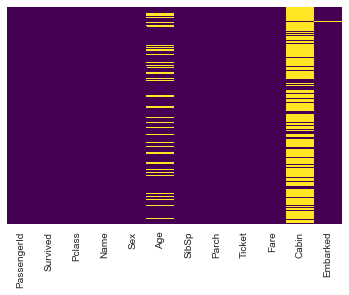

In [45]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')  

In [46]:
titanic.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Stewart, Mr. Albert A",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [47]:
original_cols = titanic.columns
def adjust_columns(col):
    '''
    Function that removes spaces betwen column names, turns them to lower case and concatenates them 
    with underscores
    '''
    ## turn column to lower case, split it by the spaces and then concatenate the words using an underscore
    return "_".join(col.lower().split())

titanic.rename(adjust_columns, axis=1, inplace=True) ### Apply the above function to the columns 
titanic.head()

,passengerid,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


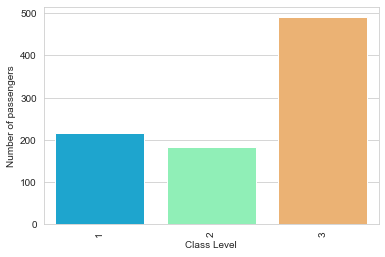

In [48]:
#Number of passengers per passenger class

group_kit = titanic[['passengerid', 'pclass']].groupby('pclass', as_index=False).count()
sns.barplot(x='pclass', y='passengerid', data=group_kit, palette='rainbow')
plt.ylabel('Number of passengers')
plt.xlabel('Class Level')
plt.xticks(rotation=90);

Text(0, 0.5, 'Ratio of Survival')

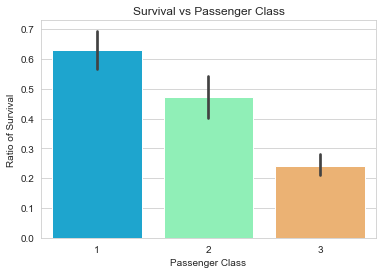

In [49]:
#Survival ratio by passenger class 

fig, ax = plt.subplots()
sns.barplot(x='pclass', y='survived', data=titanic,ax=ax, palette='rainbow');
plt.title('Survival vs Passenger Class');
plt.xlabel('Passenger Class')
plt.ylabel('Ratio of Survival')

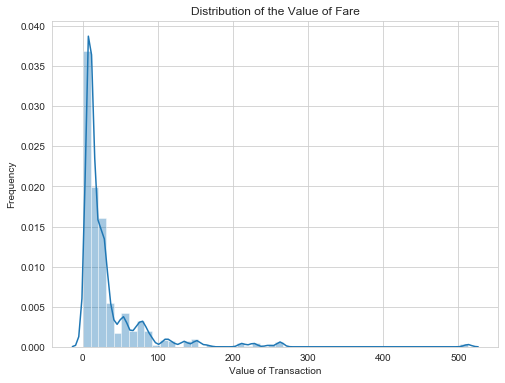

In [50]:
fig, ax = plt.subplots(figsize=(8,6))
sns.distplot(titanic.fare.abs());
plt.title('Distribution of the Value of Fare')
plt.xlabel('Value of Transaction')
plt.ylabel('Frequency');

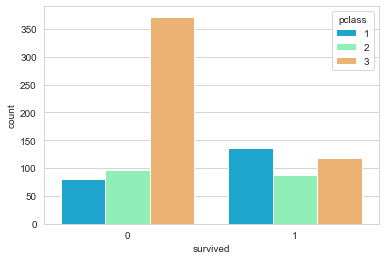

In [51]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=titanic, palette='rainbow' )

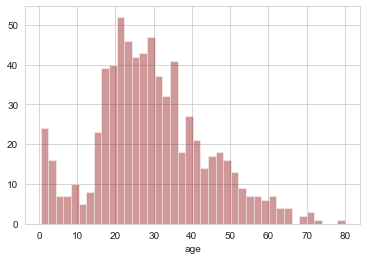

In [52]:
sns.distplot(titanic['age'].dropna(), kde=False, color='darkred',bins=40)

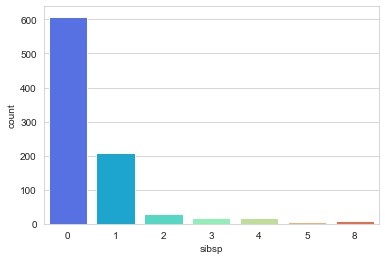

In [53]:
#Count of siblings 

sns.countplot(x='sibsp', data=titanic, palette='rainbow')

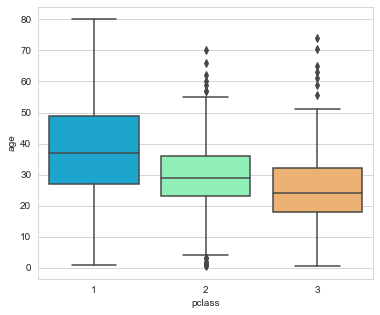

In [54]:
# Age by passenger class

plt.figure(figsize=(6, 5))
sns.boxplot(x='pclass', y='age',data=titanic, palette='rainbow' )



How to get more accurate means by category?

In [55]:
(titanic.groupby(['pclass'], as_index=False).mean()
            .groupby('pclass')['age'].mean())

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

There's a number of missing values in the age variable which will need to be address when preparing the dataset for the predicitve modelling

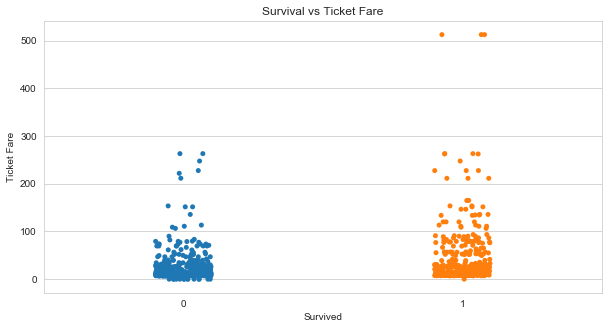

In [56]:
fig,ax = plt.subplots(figsize=(10,5))
sns.stripplot(x='survived', y='fare', jitter=True, data=titanic);
plt.title('Survival vs Ticket Fare');
plt.xlabel('Survived')
plt.ylabel('Ticket Fare');

To summarize, in the exploratory analysis phase I found that:

- Majority of passenger on the boat were in the third passenger class, while the second class represented the largest group.  
- The graphs above sugggest that there's a relationship between the passenger class and survival rate
- Youngest passengers were in the third class, while the passengers in the third group were most senior 


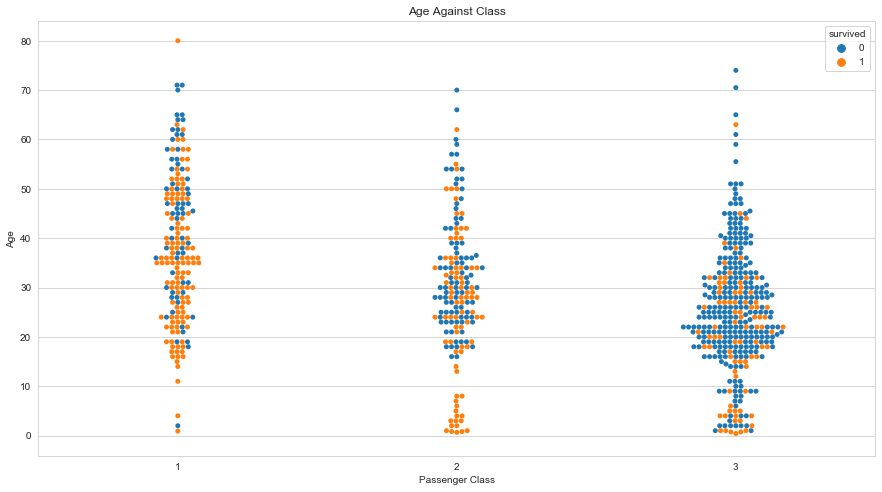

In [57]:
fig, ax = plt.subplots(figsize=(15,8))
sns.swarmplot(x= 'pclass', y='age', hue='survived', data=titanic, ax=ax);
plt.xlabel('Passenger Class');
plt.ylabel('Age')
plt.title('Age Against Class');
fig.savefig('daily_rate.png');

Text(0, 0.5, 'Fare Amount')

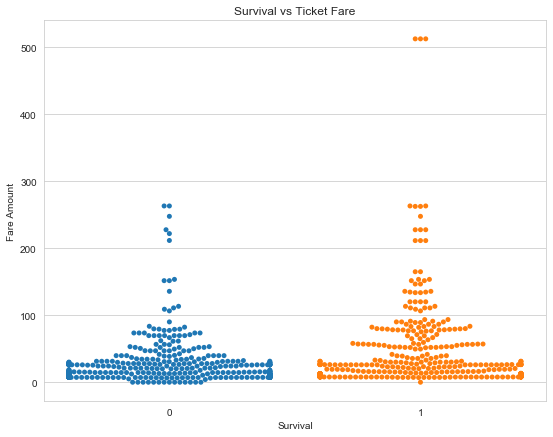

In [58]:
fig, ax = plt.subplots(figsize=(9,7))
sns.swarmplot(x='survived', y='fare', data=titanic);
plt.title('Survival vs Ticket Fare');
plt.xlabel('Survival');
plt.ylabel('Fare Amount')


## 2. Predictive Modeling

I am going to use Logistic Regression and Random Forest Regression machine learning algorithms to predict the discrete outcome of survival. I will compare the results and choose the algorithm with the higest predictive power.   


#### Feature Engineering

First, I will select the variables that will be using in the analysis (age, passenger class, fare amount, sex) and drop the remaining ones.

In [59]:
#splittingng the dataset into two groups: dependent variable and independent variables 
column_dependent = ['survived']
columns_independent = ['age','pclass','fare','sex']

Y=titanic[column_dependent]
X=titanic[columns_independent]

Next, I am going to replace the missing age values with the median, which will allow to capture the variantion of the variable while not creating too much noise. 

In [60]:
#replace missing values with median

X['age']=X['age'].fillna(X['age'].median())
X['age'].isnull().sum()

0

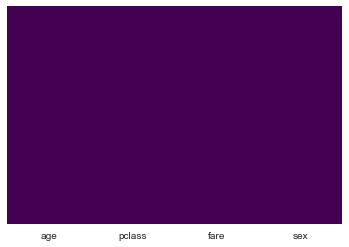

In [61]:
sns.heatmap(X.isnull(),yticklabels=False,cbar=False,cmap='viridis')  

In [62]:
#creating dummy for categorical variable
#titanic=pd.get_dummies(titanic,prefix=['sex'], drop_first=True) -- for all the categorical variables in the dataset

Then I will convert the sex variable into dummy (1:0)

In [63]:
d={'male':0,'female':1}
X['sex']=X['sex'].apply(lambda x:d[x])
X['sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: sex, dtype: int64

In [64]:
# splitting the dataset into training (67.6%) and testing (33.3%) in order to be able to evaluate the accuracy of the model

#from sklearn.model_selection import train_test_split 
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33, random_state=42)


##### Model Creation 

In [65]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.25, random_state=0)

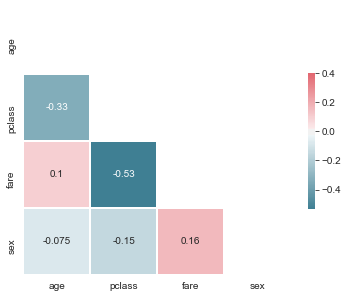

In [67]:
#Correlation graph helps to check for multicollinearity before running the model

data = pd.concat([X_train], axis='columns')

corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,annot=True, cmap=cmap, vmax=.4, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

Checking the assumption of no multicollinearity - I found no correlations between the independent variables. This means all the variables can be included in the model if it meets all the other assumptions. 

In [68]:
X_train.head()

,age,pclass,fare,sex
105,28.0,3,7.8958,0
68,17.0,3,7.9250,1
253,30.0,3,16.1000,0
320,22.0,3,7.2500,0
706,45.0,2,13.5000,1


In [69]:
X_test.head()

,age,pclass,fare,sex
495,28.0,3,14.4583,0
648,28.0,3,7.5500,0
278,7.0,3,29.1250,0
31,28.0,1,146.5208,1
255,29.0,3,15.2458,1


In [70]:
# here I'm using the Support Vector Machine which linearly separates the data --> working!

from sklearn import svm
clf=svm.LinearSVC()

clf.fit(X_train, y_train)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [71]:
clf.score(X_test, y_test)

0.7399103139013453

WHY IS THIS LESS ACCURATE THAN THE LOGISTIC REGRESSION BELOW???

In [72]:
# Phase 1

# MODEL 1: Logistic Regression

kfold = KFold(n_splits=5, shuffle=True)

results = cross_val_score(LogisticRegression(), X_train, y_train, cv= kfold, scoring='f1')
print('The mean F1 score for the Logisitic Regression algorithm is {}'.format(results.mean()))

# MODEL 2: Random Forest Classifier 

from sklearn.ensemble import RandomForestClassifier
results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv= kfold, scoring='f1')
print('The mean F1 score for the Random Forests algorithm is {}'.format(results.mean()))


The mean F1 score for the Logisitic Regression algorithm is 0.712919552307012
The mean F1 score for the Random Forests algorithm is 0.7131251494269572


In [74]:
# PHASE 2

# Standard scaling the continous variables

from sklearn.preprocessing import StandardScaler, PolynomialFeatures

numeric_cols = ['age', 'fare']
scaler = StandardScaler()
scaled_train = pd.DataFrame(scaler.fit_transform(X_train[numeric_cols]), columns = numeric_cols)
scaled_test = pd.DataFrame(scaler.transform(X_test[numeric_cols]), columns = numeric_cols)

X_train.reset_index(drop=True, inplace=True)
X_train.drop(numeric_cols, axis=1, inplace=True)
X_train = pd.concat([X_train, scaled_train], axis=1)

X_test.reset_index(drop=True, inplace=True)
X_test.drop(numeric_cols, axis=1, inplace=True)
X_test = pd.concat([X_test, scaled_test], axis=1)

In [75]:
# Repeating the model fitting to see if the results have improved 

kfold = KFold(n_splits=5, shuffle=True)

# MODEL 1
results = cross_val_score(LogisticRegression(), X_train, y_train, cv= kfold, scoring='f1')
print('The mean F1 score for the Logisitic Regression algorithm is {}'.format(results.mean()))

from sklearn.ensemble import RandomForestClassifier


# MODEL 2
results = cross_val_score(RandomForestClassifier(), X_train, y_train, cv= kfold, scoring='f1')
print('The mean F1 score for the Random Forests algorithm is {}'.format(results.mean()))

The mean F1 score for the Logisitic Regression algorithm is 0.7239035263959276
The mean F1 score for the Random Forests algorithm is 0.7243159142444856


Comparing the results with the model above, I can see that in this case using standard scaling, reduces the accuracy of our model (in particular when it comes to Random Forest). Therefore, the final version of the model that I choose is Model 1, Phase 1: Random Forest Classifier. 

In [78]:
# Testing the model using a train dataset to confirm the final results 

model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
score = f1_score(y_test, predictions)

print('The score of the model on the test data is {}'.format(score))

The score of the model on the test data is 0.7421383647798742


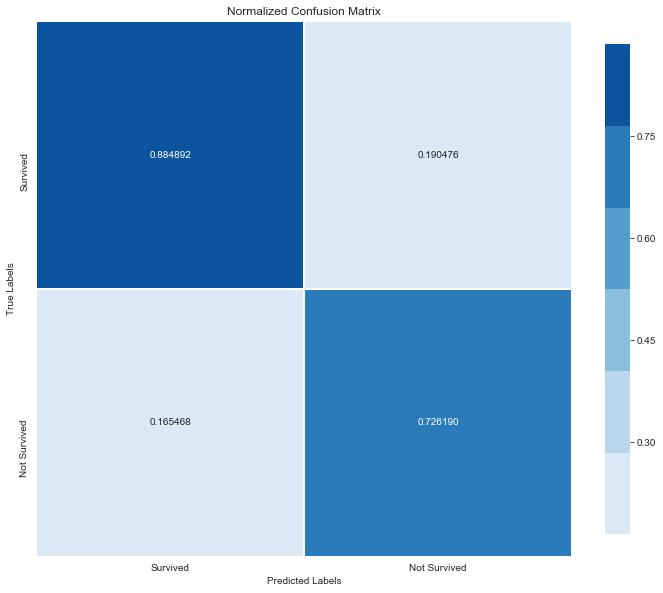

In [77]:
# We also create a confusion matrix and visualize it to get a better understanding of how the model performs

c_matrix = confusion_matrix(y_test, predictions) # obtain the confusion matrix
c_matrix = c_matrix.astype('float') / c_matrix.sum(axis=1) # create a normalized confusion matrix

# create the figure and the color map
fig, ax = plt.subplots(figsize=(12,12))
cmap = sns.color_palette("Blues")
axis_labels = ["Survived", "Not Survived"]

#create the plot
sns.heatmap(c_matrix, cmap=cmap, square=True, linewidths=.9, cbar_kws={"shrink": .75}, annot=True, xticklabels=axis_labels, yticklabels=axis_labels, fmt="f");
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels');
plt.title("Normalized Confusion Matrix")

plt.savefig('confusion_matrix')


#What is the purpose of the normalised confusion matrix? How to fix the 

From this we obtain a decent predicitive algorithm that achieves an F1-score of 73%. This could be further improved by training the algorithm on more data. 
